# Exploracion de datos

El primer paso en cualquier proyecto de aprendizaje automático es explorar los datos que usará para entrenar un modelo. El objetivo de esta exploración es intentar comprender las relaciones entre sus atributos; en particular, cualquier correlación aparente entre las características y la etiqueta que su modelo intentará predecir. Esto puede requerir algo de trabajo para detectar y corregir problemas en los datos (como tratar con valores perdidos, errores o valores atípicos), derivar nuevas columnas de características al transformar o combinar características existentes (un proceso conocido como ingeniería de características), normalizar características numéricas (valores que puede medir o contar) para que estén en una escala similar y codificar características categóricas (valores que representan categorías discretas) como indicadores numéricos.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **instant:** un identificador de fila único
- **dteday:** la fecha en la que se observaron los datos; en este caso, los datos se recopilaron diariamente; por lo que hay una fila por fecha.
- **season:** un valor codificado numéricamente que indica la temporada (1: primavera, 2: verano, 3: otoño, 4: invierno)
- **yr:** el año del estudio en el que se realizó la observación (el estudio se llevó a cabo durante dos años; el año 0 representa 2011 y el año 1 representa 2012)
- **mnth:** El mes calendario en el que se realizó la observación (1: enero ... 12: diciembre)
- **holiday:** un valor binario que indica si la observación se realizó o no en un feriado público)
- **weekday:** el día de la semana en el que se realizó la observación (0: domingo ... 6: sábado)
- **workingday:** un valor binario que indica si el día es o no un día laborable (no un fin de semana o feriado)
- **weathersit:** Un valor categórico que indica la situación meteorológica (1: despejado, 2: niebla / nube, 3: lluvia ligera / nieve, 4: lluvia intensa / granizo / nieve / niebla)
- **temp:** La temperatura en grados Celsius (normalizada)
- **atemp:** La temperatura aparente ("se siente como") en grados Celsius (normalizada)
- **hum:** el nivel de humedad (normalizado)
- **windspeed:** la velocidad del viento (normalizada)
- **rentals:** el número de alquileres de bicicletas registrados.

En este conjunto de datos, **alquileres** representa la etiqueta (el valor *y*) que nuestro modelo debe estar capacitado para predecir. Las otras columnas son características potenciales (valores *x*).

Como se mencionó anteriormente, puede realizar alguna *ingeniería de funciones* para combinar o derivar nuevas funciones. Por ejemplo, agreguemos una nueva columna llamada **día** al marco de datos extrayendo el componente de día de la columna **dteday** existente. La nueva columna representa el día del mes del 1 al 31.

In [11]:
bike_data = pd.read_csv("./datasets/daily-bike-share.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descriptivas clave. Podemos usar el método de descripción del marco de datos para generarlos para las características numéricas, así como para la columna de etiquetas de alquileres.

In [12]:
features = ["season", "temp", "atemp", "hum", "windspeed", "rentals"]
df_aux = bike_data[features]
df_aux["season"] = df_aux["season"].astype(str)
df_aux = df_aux.groupby(["season"]).agg({"temp": ["mean", min, max, "std"],
                                         "atemp": ["mean", min, max, "std"],
                                         "hum": ["mean", min, max, "std"],
                                         "windspeed": ["mean", min, max, "std"]})
df_aux.T

C:\Users\usuario1\AppData\Local\Temp/ipykernel_14840/1489743803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["season"] = df_aux["season"].astype(str)


season                 1         2         3         4
temp      mean  0.297748  0.544405  0.706309  0.422906
          min   0.059130  0.253043  0.469167  0.220833
          max   0.572500  0.808333  0.861667  0.657500
          std   0.102735  0.122650  0.070848  0.107834
atemp     mean  0.296914  0.520307  0.655898  0.415539
          min   0.079070  0.250339  0.242400  0.227913
          max   0.548617  0.757579  0.840896  0.607975
          std   0.099026  0.108022  0.072056  0.095536
hum       mean  0.582903  0.626948  0.633482  0.668719
          min   0.000000  0.254167  0.360000  0.333478
          max   0.948261  0.922500  0.939565  0.972500
          std   0.151880  0.152841  0.119349  0.131248
windspeed mean  0.214537  0.203507  0.172095  0.171995
          min   0.045408  0.065929  0.064071  0.022392
          max   0.507463  0.388067  0.375617  0.422275
          std   0.086439  0.071629  0.059526  0.081565

In [13]:
def hist_boxplot(label, fig_size = (5, 5), bins_ = 50):
    
    fig, axs = plt.subplots(2, 1, figsize = fig_size)
    
    axs[0].hist(label, bins = bins_)
    axs[0].set_title(f"{label.name}")
    axs[0].set_ylabel("Frecuency")
    axs[0].axvline(label.median(), color = "magenta", linestyle = "dashed")
    axs[0].axvline(label.mean(), color = "cyan", linestyle = "dashed")
    
    axs[1].boxplot(label, vert = False)
    axs[1].set_xlabel("Rentals")

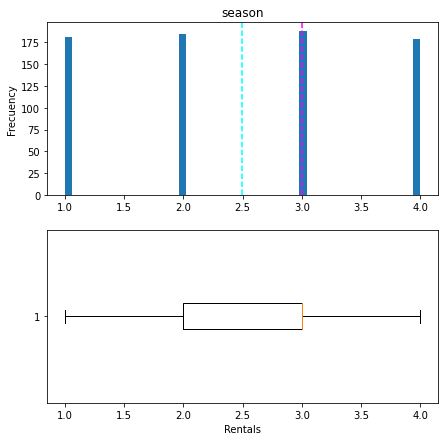

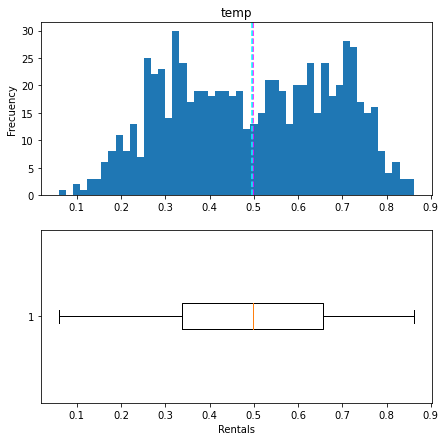

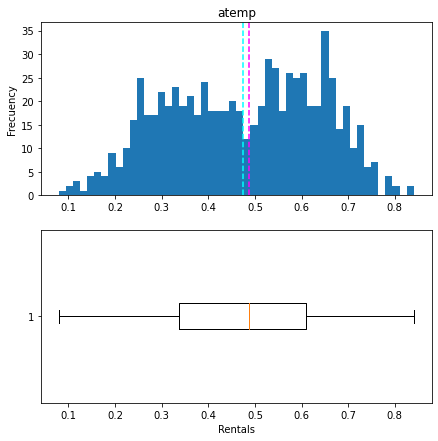

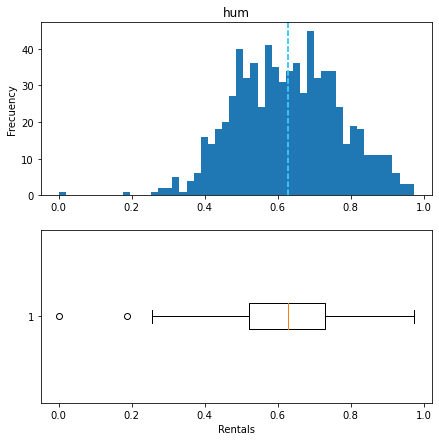

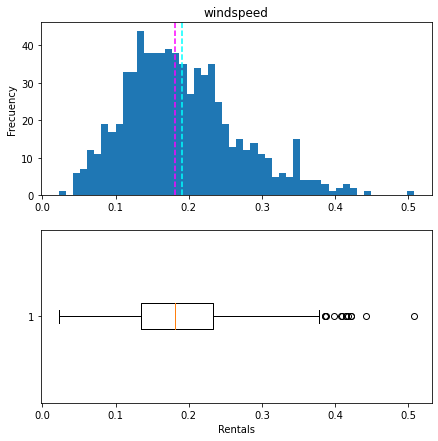

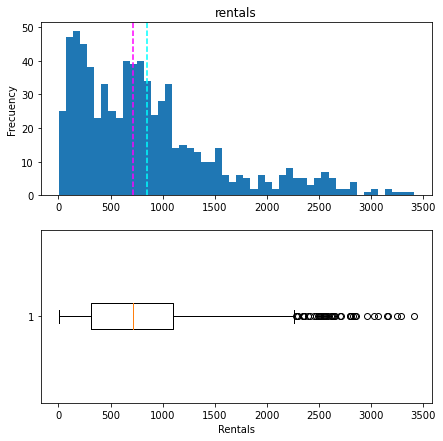

In [14]:
features = ["season", "temp", "atemp", "hum", "windspeed", "rentals"]

for col in features:
    
    hist_boxplot(label = bike_data[col], bins_ = 50, fig_size = (7,7))

# Regression

Las técnicas de aprendizaje automático supervisado implican entrenar un modelo para operar en un conjunto de características y predecir una etiqueta utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos. El proceso de entrenamiento ajusta las características a las etiquetas conocidas para definir una función general que se puede aplicar a las nuevas características para las que las etiquetas son desconocidas y predecirlas. Puede pensar en esta función de esta manera, en la que **y** representa la etiqueta que queremos predecir y **x** representa las características que usa el modelo para predecirlo.

$$y = f(x)$$

En la mayoría de los casos, **x** es en realidad un **vector** que consta de múltiples valores de características, por lo que, para ser un poco más precisos, la función podría expresarse así:

$$y = f([x_1, x_2, x_3, ...])$$

El objetivo de entrenar el modelo es encontrar una función que realice algún tipo de cálculo de los valores **x** que produzca el resultado **y**. Hacemos esto aplicando un **algoritmo** de aprendizaje automático que intenta ajustar los valores **x** a un cálculo que produce **y** con una precisión razonable para todos los casos en el conjunto de datos de entrenamiento.

Hay muchos algoritmos de aprendizaje automático para el aprendizaje supervisado y se pueden dividir en dos tipos:

- **Algoritmos de regresión**: Algoritmos que predicen un valor **y** que es un valor numérico, como el precio de una casa o el número de transacciones de venta.
- **Algoritmos de clasificación**: Algoritmos que predicen a qué categoría, o **clase**, pertenece una observación. El valor **y** en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.

> **Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).
<br>
<br>
<img src="./images/LR.png" height = "500" width = "500">

## Train a Model

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.

<br>
<img src="./images/tabla1.png" height = "700" width = "700">
<br>
<br>
<img src="./images/train_test.png" height = "500" width = "500">

* **Instancia:** A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica (Feature, labels):** A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Target (salida)**: es nuestra variable a predecir la cual tambien se conoce como variable target, salida, y_predict y entre otros. LA variable de salida del dataset siempre dependerá de que buscamos predecir, de un solo dataset pueden resultar distaintas variables de salidad y según sea nuestro objetivo escogeremos una variable u otra a predecir.
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

### Tener en cuenta:

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

## Introducción a Sckit Learn

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro
* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.

- Documentación de Scikit Learn: https://scikit-learn.org/stable/

Después de separar el conjunto de datos, ahora tenemos numerosas matrices llamadas **X** que contienen las características y **y** que contienen las etiquetas.

*Podríamos* entrenar un modelo usando todos los datos; pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos; un conjunto (normalmente más grande) con el que entrenar el modelo y un conjunto de "retención" más pequeño con el que validar el modelo entrenado. Esto nos permite evaluar qué tan bien se desempeña el modelo cuando se usa con el conjunto de datos de validación comparando las etiquetas predichas con las etiquetas conocidas. Es importante dividir los datos *al azar* (en lugar de decir, tomar el primer 70% de los datos para el entrenamiento y guardar el resto para la validación). Esto ayuda a garantizar que los dos subconjuntos de datos sean estadísticamente comparables (por lo que validamos el modelo con datos que tienen una distribución estadística similar a los datos sobre los que se entrenó).

Para dividir aleatoriamente los datos, usaremos la función **train_test_split** en la biblioteca **scikit-learn**. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [15]:
bike_data.drop(["dteday"], axis = 1, inplace = True)

In [16]:
bike_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [95]:
X = bike_data.drop(["rentals"], axis = 1).values
y = bike_data[["rentals"]].values
#X = bike_data[["temp", "hum"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 342543)

Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test**: los valores de características que usaremos para validar el modelo
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Usaremos un algoritmo de *regresión lineal*, un punto de partida común para la regresión que funciona tratando de encontrar una relación lineal entre los valores *X* y la etiqueta *y*. El modelo resultante es una función que define conceptualmente una línea en la que se cruzan todas las posibles combinaciones de valores de X e y.

En Scikit-Learn, los algoritmos de entrenamiento están encapsulados en *estimadores*, y en este caso usaremos el estimador **LinearRegression** para entrenar un modelo de regresión lineal.

In [118]:
model_lr = LinearRegression(normalize = True, n_jobs = -1)
LR_model = model_lr.fit(X_train, y_train)

In [116]:
# Predicciones
predicciones = LR_model.predict(X_test)

# Metricas de evaluacion del modelo
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 156125.29975752783
RMSE: 395.1269413207961
R2: 0.6408392423701028


C:\Users\usuario1\AppData\Local\Temp/ipykernel_14840/4106540239.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axs = Axes3D(fig)


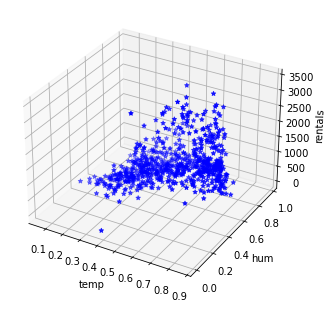

In [98]:
fig = plt.figure()
axs = Axes3D(fig)

x1 = bike_data["temp"]
x2 = bike_data["hum"]
y = bike_data["rentals"]

axs.scatter(x1, x2, y, marker = "*", c = "b")
axs.set_xlabel(bike_data["temp"].name)
axs.set_ylabel(bike_data["hum"].name)
axs.set_zlabel(bike_data["rentals"].name);

In [114]:
LR_model.predict(np.array([1, 1, 0, 1, 0, 6, 0, 2, 0.344167, 0.363625, 0.34, 0.23423]).reshape((1,-1)))

array([[1121.48499064]])